**AI Assignment 2**

Tasks To Perform 

1. Download the dataset: Dataset https://drive.google.com/file/d/1d_M-U9FBxXHER_oY7pFEkG8eWz8kJwFL/view

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the dataset into the tool.

In [3]:
data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3. Perform Below Visualizations.
● Univariate Analysis
● Bi- Variate Analysis
● Multi-Variate Analysis

● Univariate Analysis

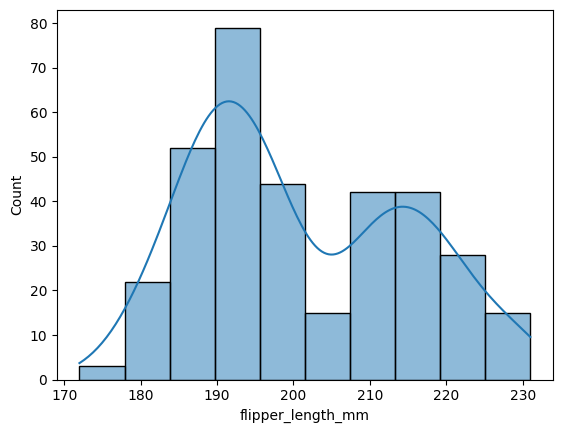

In [10]:
sns.histplot(data['flipper_length_mm'], kde=True)
plt.show()

● Bi- Variate Analysis

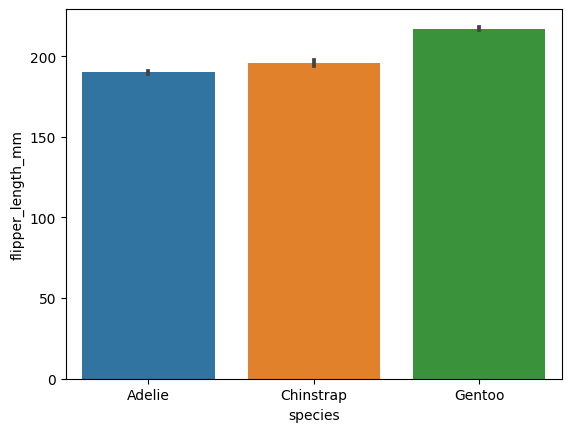

In [6]:
# plt.bar()
sns.barplot(x='species', y='flipper_length_mm', data=data)
plt.show()


<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

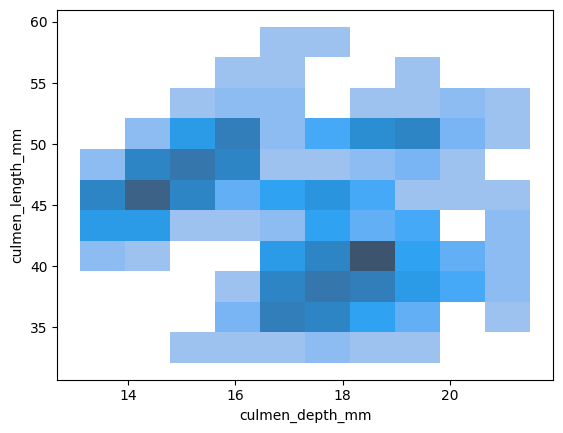

In [11]:
sns.histplot(data=data, x='culmen_depth_mm' ,y='culmen_length_mm', kde=True)


● Multi-Variate Analysis

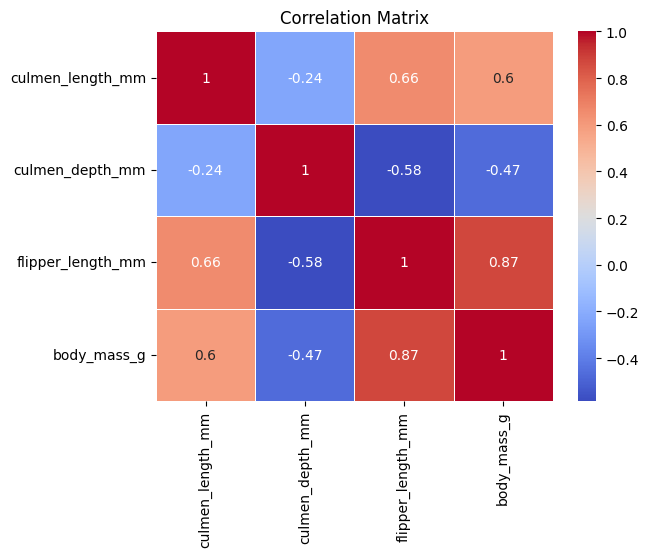

In [12]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

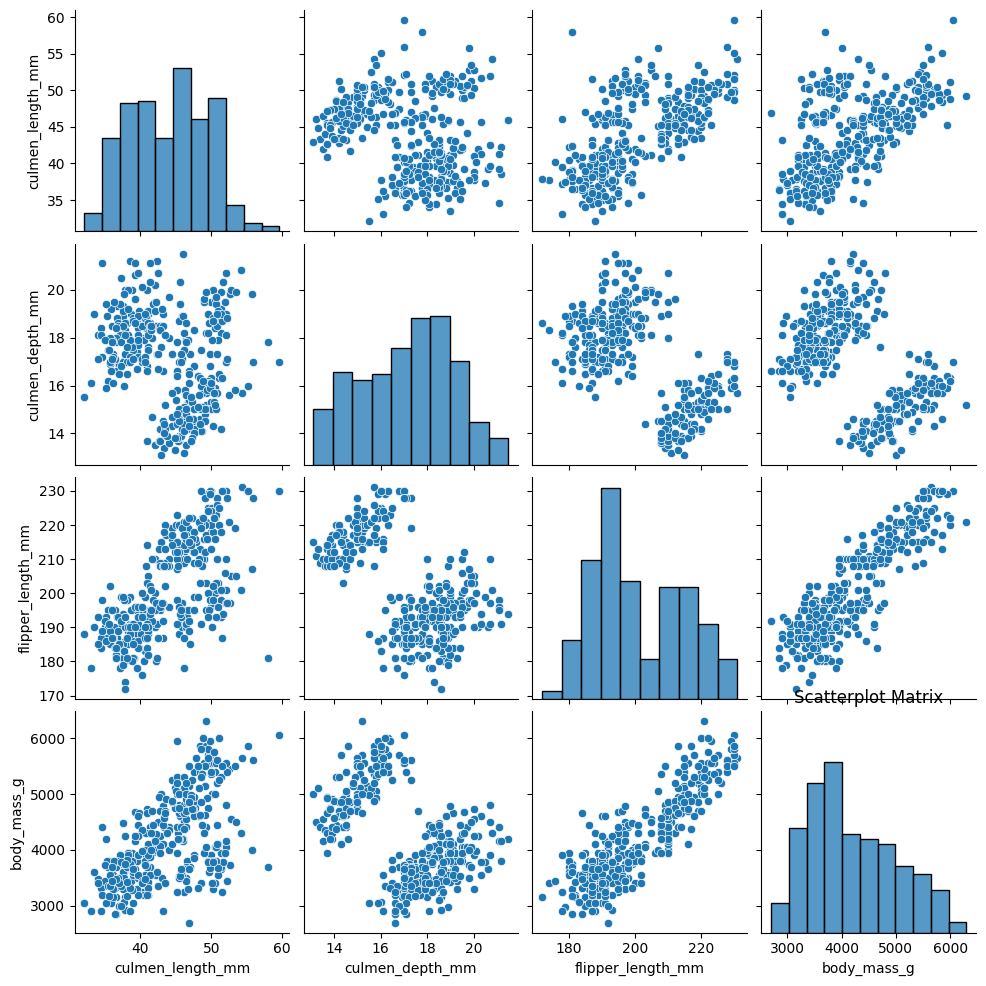

In [13]:
sns.pairplot(data)
plt.title('Scatterplot Matrix')
plt.show()

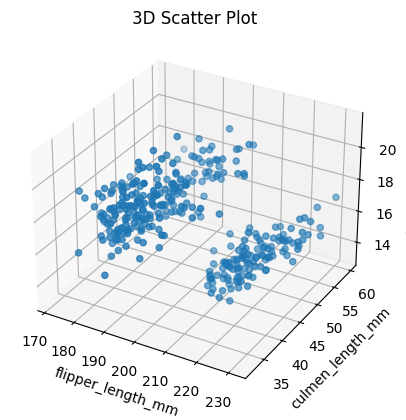

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['flipper_length_mm'], data['culmen_length_mm'], data['culmen_depth_mm'])
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('culmen_length_mm')
ax.set_zlabel('culmen_depth_mm')
plt.title('3D Scatter Plot')
plt.show()

4. Perform descriptive statistics on the dataset.


In [6]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


5. Check for Missing values and deal with them.

In [26]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [27]:
# Filled NA with mode values
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

In [28]:
data[data['sex']].unique()

# Found this error where one sex value is '.' 

array(['MALE', 'FEMALE', '.'], dtype=object)

In [65]:
index = data[data['sex'] == '.'].index[0] #336

# Found the index of '.' to drop from the row

In [66]:
data.drop(index, axis=0, inplace=True)

In [68]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [69]:
data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)

In [70]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Find the outliers and replace them outliers

<Axes: >

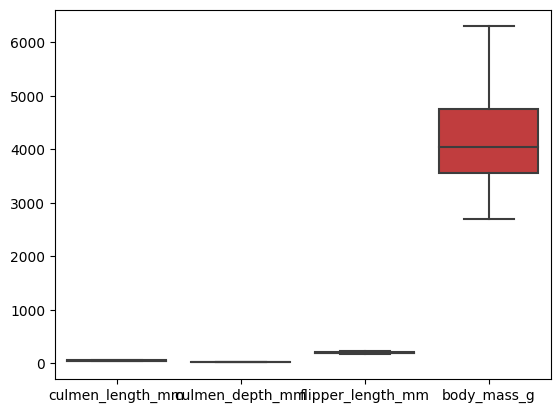

In [22]:
import seaborn as sns
sns.boxplot(data)

7. Check for Categorical columns and perform encoding.

In [71]:
data['sex'] = data['sex'].replace({'MALE': 0 , 'FEMALE': 1})
data['species'] = data['species'].replace({'Chinstrap': 0 , 'Adelie': 1, 'Gentoo' : 2})
data['island'] = data['island'].replace({'Dream': 0 , 'Torgersen': 1, 'Biscoe' : 2})


In [72]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.100000,18.700000,181.000000,3750.000000,0
1,1,1,39.500000,17.400000,186.000000,3800.000000,1
2,1,1,40.300000,18.000000,195.000000,3250.000000,1
3,1,1,43.920235,17.155425,200.868035,4199.780059,0
4,1,1,36.700000,19.300000,193.000000,3450.000000,1


9. Split the data into dependent and independent variables.


In [31]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [73]:
x=data.drop('species',axis=1)
y=data['species']

10. Scaling the data

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [75]:
scaled_data = sc.fit_transform(x)

11. Split the data into training and testing

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

12. Build the Model

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier(criterion='entropy',random_state=0)



13. Train the Model

In [80]:
rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [96]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

14. Test the Model


In [91]:
pred_rf=rf.predict(x_test)

In [97]:
pred_df=df.predict(x_test)

15. Measure the performance using Evaluation Metrics.

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
accuracy_rf=accuracy_score(y_test,pred_rf)
conmat_rf=confusion_matrix(y_test,pred_rf)

In [98]:
accuracy_df=accuracy_score(y_test,pred_df)
conmat_df=confusion_matrix(y_test,pred_df)

In [93]:
print(accuracy_rf)
print(conmat_rf)

1.0
[[19  0  0]
 [ 0 51  0]
 [ 0  0 33]]


In [99]:
print(accuracy_df)
print(conmat_df)

1.0
[[19  0  0]
 [ 0 51  0]
 [ 0  0 33]]


In [94]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        33

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [100]:
print(classification_report(y_test,pred_df))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        33

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

